# **UNIVERSIDAD ESTATAL A DISTANCIA**
TALLER INTRODUCCION A CIENCIA DE DATOS

**SESION #2**

# Preprocesamiento de datos - Caso TITANIC

In [1]:
import numpy as np
import pandas as pd

In [2]:
 data =  pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/UNED/master/titanic.csv')


In [3]:
data.shape

(891, 12)

In [4]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Podemos seleccionar el arreglo de columas que sean de nuestro interés:

In [5]:
cols_to_use = ['Pclass', 'Sex', 'Age','Fare','Survived']

In [6]:
data = data[cols_to_use]

In [7]:
data.head(10)

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
5,3,male,NaN,8.4583,0
6,1,male,54.0,51.8625,0
7,3,male,2.0,21.0750,0
8,3,female,27.0,11.1333,1
9,2,female,14.0,30.0708,1


Validamos la existencia de NaN:

In [8]:
data.isnull().values.any()

True

Validamos el tamaño original del dataset:

In [9]:
data.shape

(891, 5)

Decidimos eliminar cualquier instancia que contenga al menos, un NaN:

In [10]:
data = data.dropna()

y verificamos el tamaño final del dataset:

In [11]:
data.shape

(714, 5)

In [12]:
data['Sex'] = data['Sex'].replace({'male' : 0, 'female' : 1})

In [13]:
data.head(10)

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0
6,1,0,54.0,51.8625,0
7,3,0,2.0,21.0750,0
8,3,1,27.0,11.1333,1
9,2,1,14.0,30.0708,1
10,3,1,4.0,16.7000,1


In [14]:
from sklearn.model_selection import train_test_split

Creamos nuestro conjunto de features (X) y labels (y):

In [15]:
features = data[['Sex','Age','Fare']]
labels = data['Survived']

Vamos a dividir los datos 60-40:

In [16]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.40, random_state = 13) 

In [17]:
X_train.shape

(428, 3)

# Ahora iniciaremos con algo nuevo #


Predecir la supervivencia en el  Titanic, es un problema de CLASIFICACION: Sobrevivió/Murió. 

Utilizaremos:  regresión logística y venecino más cercano.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

**Habíamos dividio los datos en train y test**

          X_train,X_test, y_train, y_test = train_test_split(features, labels, random_state = 13)


**Regresión logística**

In [19]:
lr = LogisticRegression().fit(X_train, y_train)

In [20]:
Y_pred = lr.predict(X_test)

In [21]:
lr.score(X_train, y_train)

0.7710280373831776

**Vecino más cercano** -K neighbors

In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [24]:
Y_pred = knn.predict(X_test)

In [25]:
knn.score(X_train, y_train)

0.8481308411214953

**¿Cuál algoritmo de Machine Learning seleccionaría?**

Ahora, modifique el tamaño de la distribución de los datos (train y test) y revise si hay variación en el resultado.


### Regresión logística

In [26]:
#el resultado en 80-20 fue 0.7710280373831776
lr.score(X_train, y_train)


0.7710280373831776

### Vecino más cercano -K neighbors

In [27]:
#el resultado en 80-20 fue 0.8481308411214953
knn.score(X_train, y_train)

0.8481308411214953

**¿Cómo les fue?**

# **CORRELACION DE DATOS GRAFICA**

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [29]:
datos = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/diamonds.csv')

In [30]:
datos.shape  

(53940, 11)

In [31]:
datos.head (5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
del datos['Unnamed: 0'] #eliminar la columna de autonumeración

In [33]:
datos.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


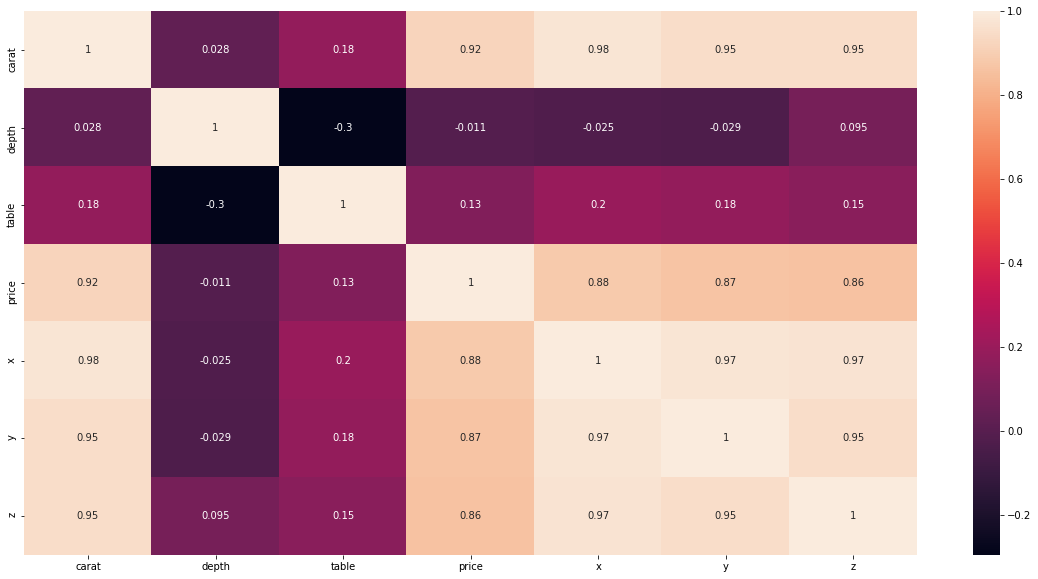

In [34]:
plt.figure(figsize=(20, 10))
sns.heatmap(datos.corr(), annot=True)

## **NORMALIZAR LOS DATOS**

In [35]:
#Paso 1 - asignar 0 a los datos nulos
datos = datos.fillna(0)


In [36]:
#Paso 2 - Normalizar los datos para que esten en el intervalo (0,1)
#LAS COLUMNAS SE DUPLICARAN
processed_dataP = datos
processed_dataP["PRICE"] = processed_dataP["price"]/datos["price"].max()
processed_dataP["X"] = processed_dataP["x"]/datos["x"].max()
processed_dataP["Y"] = processed_dataP["y"]/datos["y"].max()
processed_dataP["Z"] = processed_dataP["z"]/datos["z"].max()

In [37]:
print("Muestra de los Datos")
processed_dataP.head(10)

Muestra de los Datos


,carat,cut,color,clarity,depth,table,price,x,y,z,PRICE,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.017319,0.367784,0.067572,0.076415
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.017319,0.362197,0.065195,0.072642
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.017372,0.377095,0.069100,0.072642
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.017744,0.391061,0.071817,0.082704
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.017797,0.404097,0.073854,0.086478
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0.017851,0.366853,0.067233,0.077987
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,0.017851,0.367784,0.067572,0.077673
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,0.017904,0.378957,0.069779,0.079560
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,0.017904,0.360335,0.064177,0.078302
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,0.017957,0.372439,0.068761,0.075157


## OUTLIERS

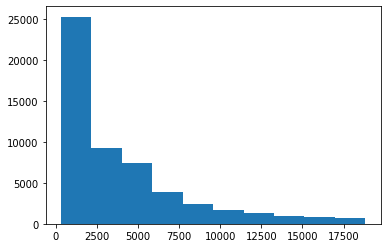

In [38]:
#característica de precio sin normalizar
plt.hist(processed_dataP["price"])
plt.show()

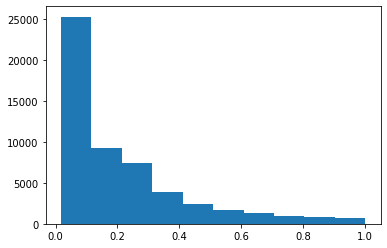

In [39]:
#característica de precio  normalizar
plt.hist(processed_dataP["PRICE"])
plt.show()

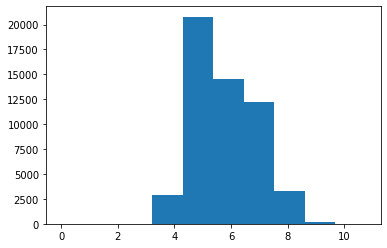

In [40]:
#característica medida x  sin normalizar
plt.hist(processed_dataP["x"])
plt.show()

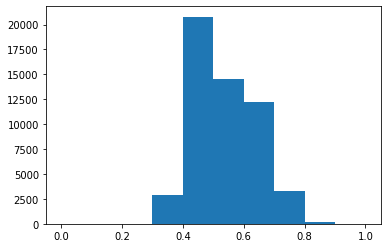

In [41]:
#característica medida x  normalizar
plt.hist(processed_dataP["X"])
plt.show()

## **ONE HOT ENCODE**

In [42]:
#TAREA 

### **ELIMINAR COLUMNAS**

In [43]:
datoReducidos = datos


In [44]:

del datoReducidos['depth'] #eliminar la columna de depth
del datoReducidos['table'] #eliminar la columna de table
del datoReducidos['cut'] #eliminar la columna de corte
del datoReducidos['color'] #eliminar la columna de color
del datoReducidos['clarity'] #eliminar la columna de claridad

#Además eliminamos las columnas duplicadas (NO NORMALIZADAS)

del datoReducidos['x'] #eliminar la columna de table
del datoReducidos['y'] #eliminar la columna de corte
del datoReducidos['z'] #eliminar la columna de color
del datoReducidos['price'] #eliminar la columna de claridad


In [45]:
datoReducidos.head()

,carat,PRICE,X,Y,Z
0,0.23,0.017319,0.367784,0.067572,0.076415
1,0.21,0.017319,0.362197,0.065195,0.072642
2,0.23,0.017372,0.377095,0.069100,0.072642
3,0.29,0.017744,0.391061,0.071817,0.082704
4,0.31,0.017797,0.404097,0.073854,0.086478


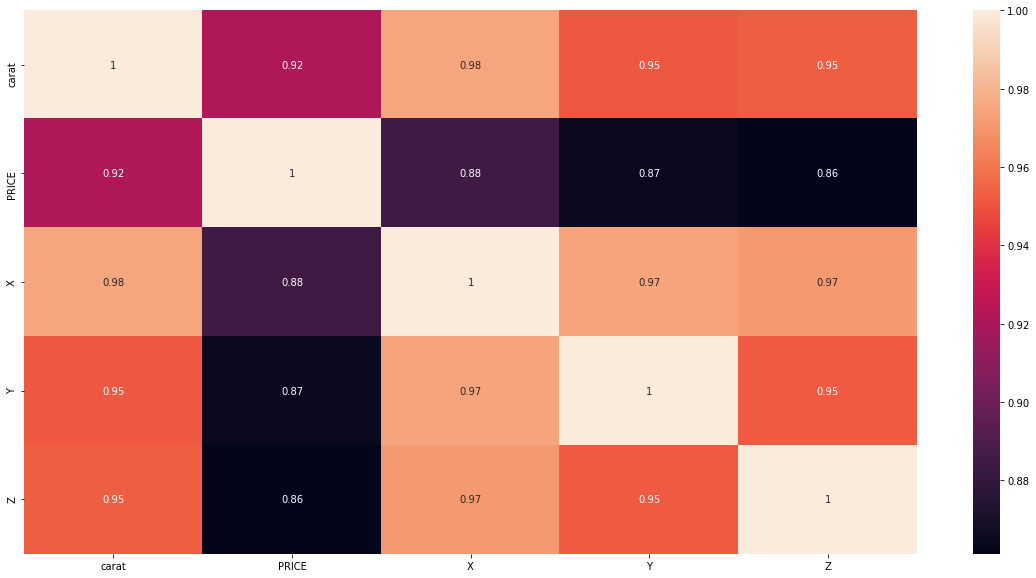

In [46]:
plt.figure(figsize=(20, 10))
sns.heatmap(datoReducidos.corr(), annot=True)

## Visualización por Combinación

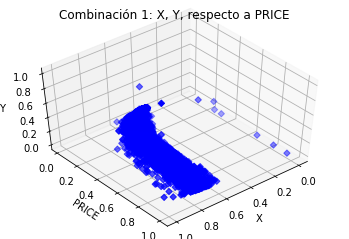

In [47]:
#GRAFICAR LA PRIMERA COMBINACION
fig = plt.figure()
ax = fig.add_subplot (111, projection='3d')


ax.scatter(datoReducidos['X'], datoReducidos['PRICE'], datoReducidos['Y'], c='b', marker='D')

ax.set_xlabel('X')
ax.set_ylabel('PRICE')
ax.set_zlabel('Y')

fig.subplots_adjust(bottom=0.1) 
ax.view_init(50,50)

plt.title("Combinación 1: X, Y, respecto a PRICE")
plt.show()

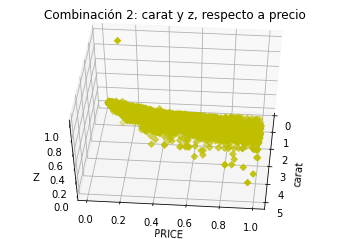

In [48]:
#GRAFICAR LA SEGUNDA COMBINACION
fig = plt.figure()
ax = fig.add_subplot (111, projection='3d')


ax.scatter(datoReducidos['carat'], datoReducidos['PRICE'], datoReducidos['Z'], c='y', marker='D')

ax.set_xlabel('carat')
ax.set_ylabel('PRICE')
ax.set_zlabel('Z')

fig.subplots_adjust(bottom=0.1) 
ax.view_init(50,5)

plt.title("Combinación 2: carat y z, respecto a precio")
plt.show()


**Es importante que observemos que en este caso vamos a predecir un valor, no es un problema de clasificación como el anterior del titanic.** 

## **REGRESION LINEAL**

In [49]:
from sklearn.linear_model import LinearRegression


In [50]:
datoReducidos.head(10)

,carat,PRICE,X,Y,Z
0,0.23,0.017319,0.367784,0.067572,0.076415
1,0.21,0.017319,0.362197,0.065195,0.072642
2,0.23,0.017372,0.377095,0.069100,0.072642
3,0.29,0.017744,0.391061,0.071817,0.082704
4,0.31,0.017797,0.404097,0.073854,0.086478
5,0.24,0.017851,0.366853,0.067233,0.077987
6,0.24,0.017851,0.367784,0.067572,0.077673
7,0.26,0.017904,0.378957,0.069779,0.079560
8,0.22,0.017904,0.360335,0.064177,0.078302
9,0.23,0.017957,0.372439,0.068761,0.075157


In [51]:
#-------para tres dimensiones
features3 = datoReducidos[["X","Y", "Z"]]
labels3 = datoReducidos['PRICE']



In [52]:
X_train3,X_test3, y_train3, y_test3 = train_test_split(features3, labels3, random_state =30)

### **PARA TRES DIMENSIONES**

In [53]:
lr3 = LinearRegression().fit(X_train3, y_train3)

In [54]:
lr3.score(X_train3, y_train3)


0.7849154329338643

In [55]:
lr3.score(X_test3, y_test3)

0.7753945861679741

### **PARA CUATRO DIMENSIONES**

In [56]:
#Para cuatro dimensiones
features4 = datoReducidos[["X","Y", "Z", "carat"]]
labels4 = datoReducidos['PRICE']

In [57]:
X_train4,X_test4, y_train4, y_test4 = train_test_split(features4, labels4, random_state = 13)

In [58]:
lr4 = LinearRegression().fit(X_train4, y_train4)

In [59]:
lr4.score(X_train4, y_train4)

0.855332063841813

In [60]:
lr4.score(X_test4, y_test4)

0.8500740101487542

## AHORA, apliquen uno de los dos modelos regresión o vecino más cercano a los datos del diabetes. 